# Customer_Churn

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

# 1. Importing Required Libraries

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 2. The data set includes information about:

1. Customers who left within certain period of month – the column is called Churn

2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

4. Demographic info about customers – gender, age range, and if they have partners and dependents

# 2.1 Each table is described below.

# 2.1.1 Demographics

1. CustomerID: A unique ID that identifies each customer.
    
2. Gender: The customer’s gender: Male, Female.
        
3. Senior Citizen: Indicates if the customer is 65 or older: Yes, No
        
4. Partner : Whether the customer has a partner or not (Yes, No)
    
5. Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

# 2.1.2 Services


CustomerID: A unique ID that identifies each customer.

Tenure in Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.


Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No


Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.


Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.


# Lets Look at Our Dataset

In [21]:
df=pd.read_csv("F:\PGDDS\PGD_Data_Science\csv_data\customerchurn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
df.drop("customerID", axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [23]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [24]:
df = df.fillna(0)

In [25]:
df.replace({'No phone service':"No", 'No internet service':"No"},inplace = True)

In [26]:
df.replace({'No':0, 'Yes':1},inplace=True)

In [27]:
df.replace({'Male':0, 'Female':1},inplace=True)

In [28]:
df = pd.get_dummies(data = df , columns = ["InternetService","Contract", "PaymentMethod"], drop_first = True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

In [30]:
X = df.drop("Churn", axis = True)
y = df.Churn

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
lr = LogisticRegression(max_iter=100000)

In [33]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [34]:
lr.score(X_test, y_test)

0.8163440860215053

In [35]:
y_pred = lr.predict(X_train)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [36]:
cf = confusion_matrix(y_train, y_pred)

In [37]:
labels = ['NO', 'YES']

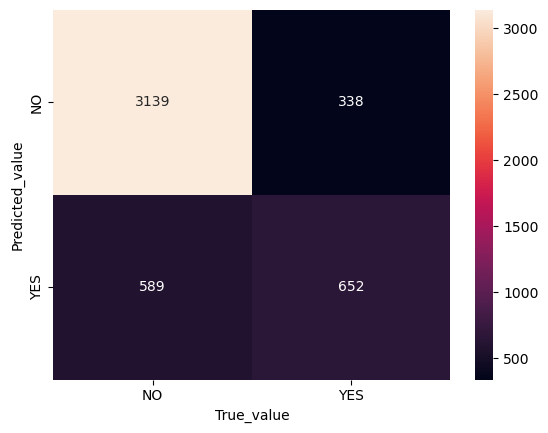

In [38]:
sns.heatmap(cf ,annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.xlabel('True_value')
plt.ylabel('Predicted_value')
plt.show()

In [39]:
df0 = df[df["Churn"]==0]
df1 = df[df["Churn"]==1]

In [40]:
df0.shape

(5174, 24)

In [41]:
df1.shape

(1869, 24)

In [42]:
reduced = df0.sample(df0.shape[0])

In [43]:
low = pd.concat([reduced,df1])

In [44]:
X_low = low.drop("Churn", axis = 1)
y_low = low.Churn

In [45]:
X_low_train, X_low_test, y_low_train, y_low_test = train_test_split(X_low, y_low, test_size=0.20, random_state=42)

In [46]:
lr.fit(X_low_train, y_low_train)
lr.score(X_low_test, y_low_test)

0.815471965933286

In [47]:
y_low_pred = lr.predict(X_low_train)
y_low_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

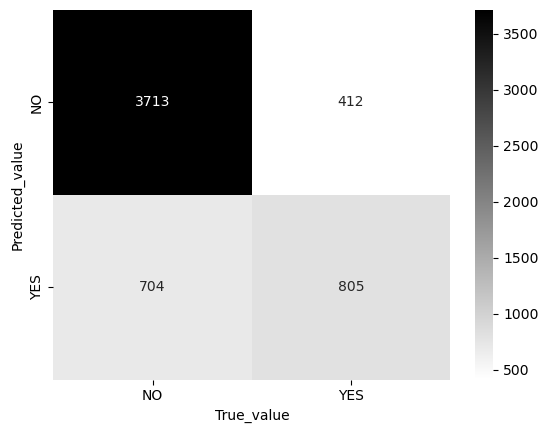

In [48]:
cf1 = confusion_matrix(y_low_train, y_low_pred)
sns.heatmap(cf1 ,annot=True, fmt = 'd', cmap="binary", xticklabels=labels, yticklabels=labels)
plt.xlabel('True_value')
plt.ylabel('Predicted_value')
plt.show()

In [49]:
increased = df1.sample(df1.shape[0], replace = True)

In [50]:
high = pd.concat([increased,df0])

In [51]:
X_high = high.drop("Churn", axis = 1)
y_high = high.Churn

In [52]:
X_high_train, X_high_test, y_high_train, y_high_test = train_test_split(X_high, y_high, test_size=0.20, random_state=42)

In [53]:
lr.fit(X_high_train, y_high_train)
lr.score(X_high_test, y_high_test)

0.8019872249822569

In [54]:
y_high_pred = lr.predict(X_high_train)
y_high_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

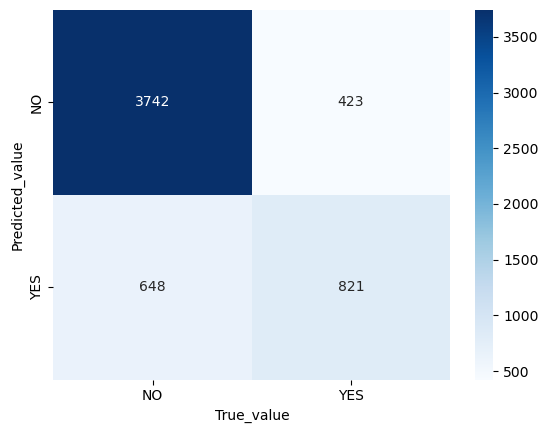

In [55]:
cf2 = confusion_matrix(y_high_train, y_high_pred)
sns.heatmap(cf2 ,annot=True, fmt = 'd', cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels)
plt.xlabel('True_value')
plt.ylabel('Predicted_value')
plt.show()

In [56]:
print(classification_report(y_high_train, y_high_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4165
           1       0.66      0.56      0.61      1469

    accuracy                           0.81      5634
   macro avg       0.76      0.73      0.74      5634
weighted avg       0.80      0.81      0.80      5634



on resume description

To predict which customers are likely to leave a company (churn) based on
telecom data.
In this work, We Data Prepossessing, and Correlation Matrix and use Supervised ML
models like Logistics Regression and Random Forest Classifier also and fit the various
model to check which model gives us the best accuracy by the evolution of metrics and


Conclusion:

By leveraging this dataset, organizations can gain insights, develop data-driven strategies, and improve customer retention efforts, leading to enhanced customer satisfaction, increased revenue, and sustainable business growth.

Achieve 87% accuracy in predictions and recommendations."